In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
census = pd.read_csv(os.path.join('census/Farm locations with GPS-BMGF scoping study anonymized.csv'))

In [3]:
census

,Country,State,LGA,Village/community/cluster,Latitude,Longitude,Altitude,Precision
0,Nigeria,Anambra,Nnewi North,"Okpuno Egbu,umudim Nnewi",6.003020,6.911031,105.0,5.0
1,Nigeria,Niger,Bosso,Lapan Gwari,9.522492,6.501495,218.0,5.0
2,Nigeria,Anambra,Nnewi North,Obiuno Otono Nnewi,6.003876,6.947194,162.0,5.0
3,Nigeria,Niger,Bosso,Lapai Gwari,9.521646,6.503245,211.0,5.0
4,Nigeria,Anambra,Nnewi North,Obiuno Otolo Nnewi,6.001282,6.944940,102.0,5.0
...,...,...,...,...,...,...,...,...
643,Nigeria,Oyo,Lagelu,Akobo,7.453598,3.959697,258.0,15.0
644,Nigeria,Oyo,Lagelu,Olounda,7.472148,3.957719,290.0,27.0
645,Nigeria,Oyo,Lagelu,Ojurin,7.453121,3.960111,279.0,36.0
646,Nigeria,Oyo,Lagelu,Eni osa,7.517224,3.971331,280.0,8.0


In [4]:
census.groupby('State').count()

,Country,LGA,Village/community/cluster,Latitude,Longitude,Altitude,Precision
State,,,,,,,
Anambra,50,50,50,50,50,50,50
Delta,146,146,146,146,146,146,146
Kano,53,53,53,52,52,52,52
Lagos,150,150,150,150,150,150,150
Niger,51,51,51,51,51,51,51
Ogun,83,83,83,83,83,83,83
Oyo,48,48,48,48,48,48,48
Rivers,67,67,67,67,67,67,67


In [5]:
delta_ogun = pd.read_csv("census/GPS Coordinates - Delta Ogun Kwara v1 (1).csv")

In [6]:
delta_ogun.groupby('State').count()

,N°,_GPS coordinates:_latitude,_GPS coordinates:_longitude
State,,,
Delta,364,362,362
Ogun,343,332,332


In [7]:
kwara = pd.read_csv("census/GPS Coordinates - Kwara v1 (1).csv")
kwara.groupby('State').count()

,N°,_GPS coordinates_latitude,_GPS coordinates_longitude
State,,,
Kwara,391,388,388


In [8]:
census.groupby('State').count().index.values

array(['Anambra', 'Delta', 'Kano', 'Lagos', 'Niger', 'Ogun', 'Oyo',
       'Rivers'], dtype=object)

In [9]:
counts = census.groupby('State').count()['Latitude'].values

In [10]:
df_total = {state: count for state, count in zip(census.groupby('State').count().index.values, counts)}

In [11]:
kwara.groupby('State').count().loc['Kwara']['_GPS coordinates_latitude']

np.int64(388)

In [12]:
df_total['Delta'] = delta_ogun.groupby('State').count().loc['Delta']['_GPS coordinates:_latitude']
df_total['Ogun'] = delta_ogun.groupby('State').count().loc['Ogun']['_GPS coordinates:_latitude']


In [13]:
df_total['Kwara'] = kwara.groupby('State').count().loc['Kwara']['_GPS coordinates_latitude']

In [14]:
df_count = pd.DataFrame(df_total, index=['count']).T

In [15]:
df_count = df_count.reset_index().rename(columns={'index': 'admin1Name'})

In [16]:
df_count

,admin1Name,count
0,Anambra,50
1,Delta,362
2,Kano,52
3,Lagos,150
4,Niger,51
5,Ogun,332
6,Oyo,48
7,Rivers,67
8,Kwara,388


In [17]:
# nigeria_all = gpd.read_file("C:\\Users\\tac19\\OneDrive\\Documents\\Future\\RemoteSensing\\Nigeria\\ngaadmbndaadm1osgof\\nga_admbnda_adm1_osgof_20161215.shp").to_crs('EPSG:3857')

DATA_PATH = '/lustre/davis/FishPonds_project/share/data/'
nigeria_all = gpd.read_file(os.path.join(DATA_PATH, "Nigeria/ngaadmbndaadm1osgof/nga_admbnda_adm1_osgof_20161215.shp")).to_crs('EPSG:3857')

In [18]:
df = nigeria_all.merge(df_count, on='admin1Name', how='left')

In [19]:
df = df.fillna(-100)

/tmp/ipykernel_10877/1070291891.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(-100)
/tmp/ipykernel_10877/1070291891.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(-100)


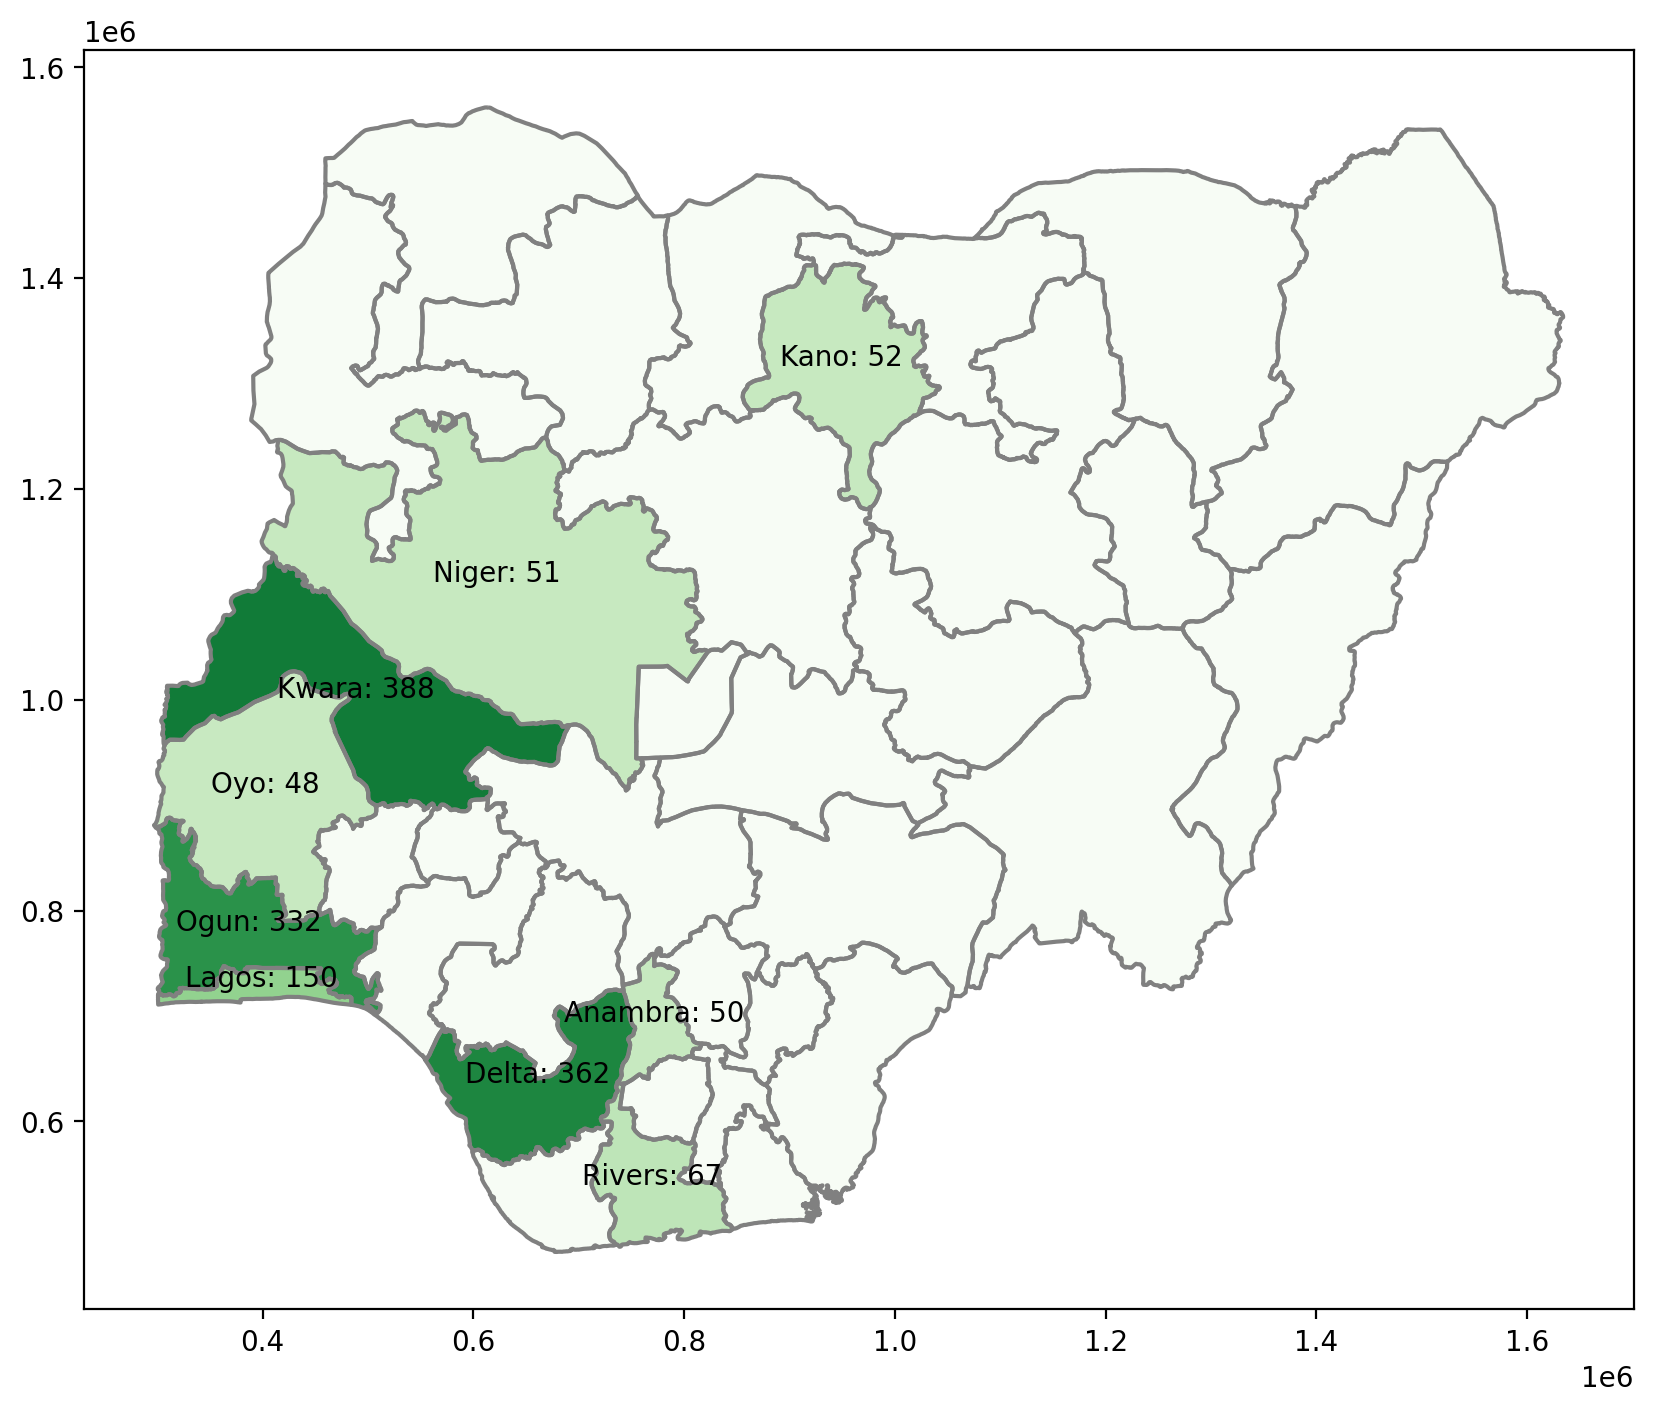

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
df.plot(column="count", ax=ax, cmap='Greens', vmax=500)
df.boundary.plot(ax=ax, color='gray')
df.apply(lambda x: ax.annotate(text=f'{x["admin1Name"]}: {int(x["count"])}', xy=x.geometry.centroid.coords[0], ha='center', color='black') if x['count'] > -10 else 0, axis=1);

In [21]:
df[df['admin1Name'] == 'Abia']

,admin1Name,admin1Pcod,admin1RefN,admin1AltN,admin1Al_1,admin0Name,admin0Pcod,date,validOn,validTo,Shape_Leng,Shape_Area,geometry,count
0,Abia,NG001,Abia,-100,-100,Nigeria,NG,2016-11-29,2016-12-15,-100,4.695135,0.396543,"POLYGON ((822295.962 673246.325, 822348.927 67...",-100.0


In [28]:
from cartopy import crs as ccrs
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

import matplotlib.ticker as ticker
from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar



/lustre/davis/sw/FishPonds/conda_qgis_2025/20250606/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lustre/davis/sw/FishPonds/conda_qgis_2025/20250606/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lustre/davis/sw/FishPonds/conda_qgis_2025/20250606/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lustre/davis/sw/FishPonds/conda_qgis_2025/20250606/lib/python3.11/site-packages/matplotlib_map_utils/core/scale_bar.py:790: UserWarning: As one of bar['max'] and bar['major_div'] were not s

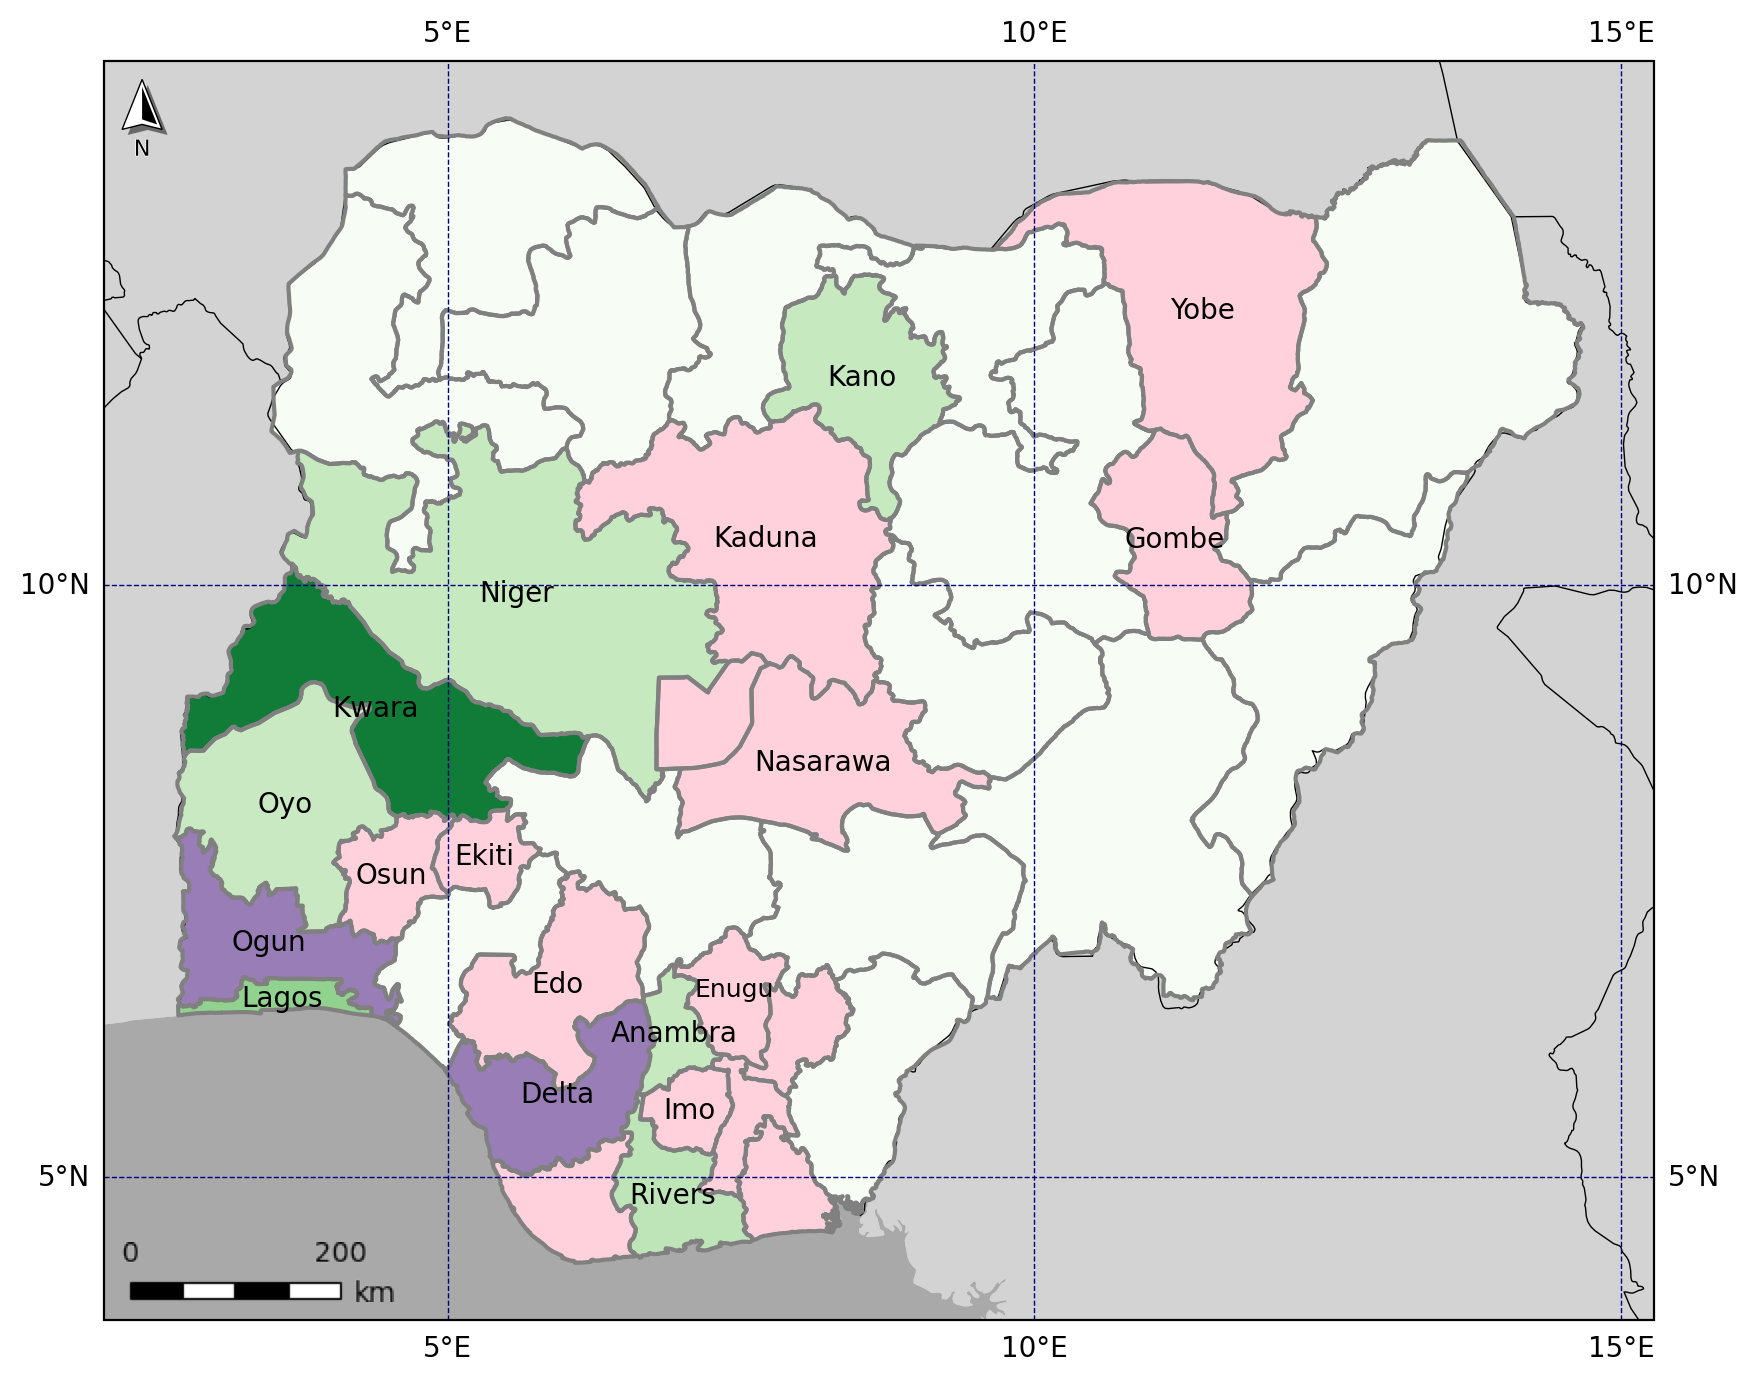

In [29]:
crs_epsg = ccrs.epsg("3857")
fig, ax = plt.subplots(figsize = (10,10), subplot_kw={'projection': crs_epsg})
df.plot(column="count", ax=ax, cmap='Greens', vmax=500)
df.boundary.plot(ax=ax, color='gray')
df.apply(lambda x: ax.annotate(text=f'{x["admin1Name"]}', xy=x.geometry.centroid.coords[0], ha='center', va='center', color='black') if x['count'] > -10 else 0, axis=1);
df[df['admin1Name'] == 'Delta'].plot(ax=ax, color='#987db7')
df[df['admin1Name'] == 'Ogun'].plot(ax=ax, color='#987db7')

states_pred = [
"Abia", 
"Akwa Ibom", 
"Bayelsa", 
"Edo", 
"Ekiti",
"Federal Capital Territory",
"Gombe",
"Osun",
"Ebonyi",
"Enugu",
"Imo",
"Nasarawa",
"Yobe",
"Kaduna" ]

for ss in states_pred: 
    df[df['admin1Name'] == ss].plot(ax=ax, color='#FFD1DC')
    if ss not in ["Federal Capital Territory", "Akwa Ibom", "Abia", "Bayelsa", "Ebonyi", "Enugu"]:
        df[df['admin1Name'] == ss].apply(lambda x: ax.annotate(text=f'{x["admin1Name"]}', xy=x.geometry.centroid.coords[0], ha='center', va='center', color='black', annotation_clip=True), axis=1);
    elif ss == "Enugu":
        df[df['admin1Name'] == ss].apply(lambda x: ax.annotate(text=f'{x["admin1Name"]}', xy=x.geometry.centroid.coords[0] , ha='center', fontsize=9, color='black'), axis=1);



# Format lat/lon gridlines using cartopy
lon_ticks = [0, 5, 10, 15]
lat_ticks = [5, 10]
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='navy', ls='--')
gl.xlocator = ticker.FixedLocator(lon_ticks)
gl.ylocator = ticker.FixedLocator(lat_ticks)
gl.right_labels = True
gl.bottom_labels = True
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}


import cartopy.feature as cfeature

# ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
# ax.add_feature(cfeature.LAKES, facecolor='lightgray')
# ax.add_feature(cfeature.STATES, linewidth=0.25)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='darkgray')
NorthArrow.set_size("small")
ScaleBar.set_size("small")
north_arrow(
    ax, location="upper left", rotation={"crs": crs_epsg, "reference": "center"}
)
scale_bar(ax, location="lower left", style="boxes", bar={"projection": crs_epsg, "unit": "km", "max": 200, }, 
          labels={"textcolors": "black"}, text= {"fontsize":10, "stroke_width":0})


In [30]:
agro = gpd.read_file("Nigeria_Agroecological_zone_shapefile/Nigeria_Agroecological_zone_shapefile.shp")

In [31]:
agro

,OBJECTID,AEZ_NAME,ORIG_FID,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,Tropic - cool / humid,10,3.014806e+04,5.144335e+07,3.015778e+04,"POLYGON ((1048608.369 705829.662, 1048314.844 ..."
1,2,Tropic - cool / humid,10,3.409747e+04,5.282885e+07,3.224148e+04,"POLYGON ((1252527.708 730221.495, 1252533.029 ..."
2,3,Tropic - cool / semiarid,11,5.141956e+03,1.689663e+06,5.141956e+03,"POLYGON ((989819.365 1158473.489, 989442.109 1..."
3,4,Tropic - cool / semiarid,11,6.265051e+03,2.455447e+06,6.265051e+03,"POLYGON ((992974.375 1160345.702, 992791.744 1..."
4,5,Tropic - cool / semiarid,11,5.073021e+03,1.659513e+06,5.073021e+03,"POLYGON ((1027846.103 1132082.82, 1026722.717 ..."
...,...,...,...,...,...,...,...
81,82,Tropic - warm / subhumid,16,9.417937e+03,4.768530e+06,9.417937e+03,"POLYGON ((1238573.795 751280.581, 1238476.386 ..."
82,83,Tropic - warm / subhumid,16,5.080444e+03,1.666692e+06,5.080444e+03,"POLYGON ((1310969.452 798916.582, 1310639.373 ..."
83,84,Tropic - warm / subhumid,16,5.065399e+03,1.652143e+06,5.065399e+03,"POLYGON ((1400263.522 965648.908, 1399642.973 ..."
84,85,Tropic - warm / subhumid,16,5.091703e+03,1.668014e+06,5.091704e+03,"POLYGON ((1001875.265 1110412.269, 1000745.055..."


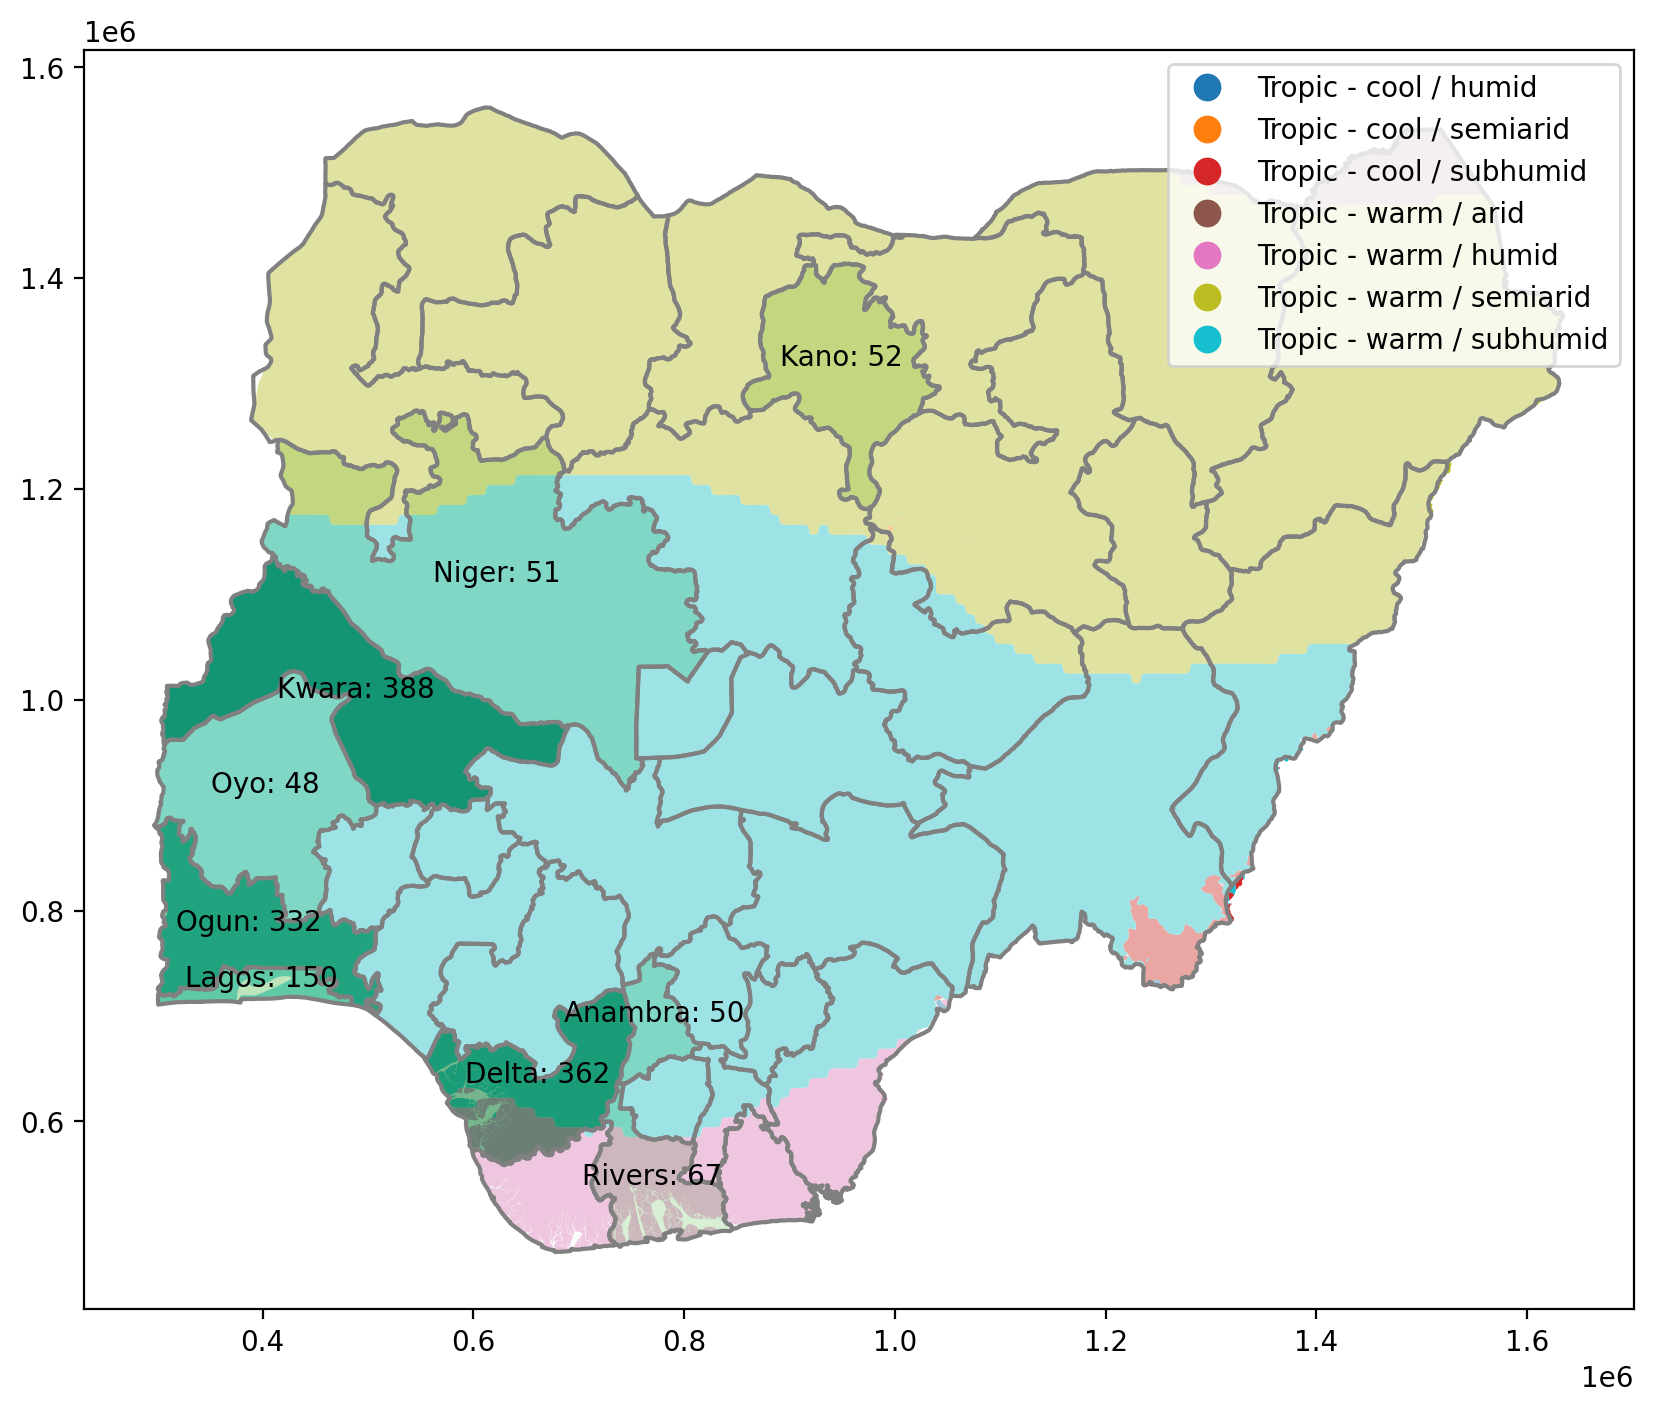

In [32]:


fig, ax = plt.subplots(figsize = (10,10))
agro.plot(column='AEZ_NAME', ax=ax, legend=True)

df.plot(column="count", ax=ax, alpha=0.6, cmap='Greens', vmax=500)
df.boundary.plot(ax=ax, color='gray')
df.apply(lambda x: ax.annotate(text=f"{x['admin1Name']}: {int(x['count'])}", xy=x.geometry.centroid.coords[0], ha='center', color='black') if x['count'] > -10 else 0, axis=1);

In [35]:
indices_tac = gpd.read_file("../FalseP_filtering/all_ML-filtering-dataset_geocoords_features_indices_final.csv")

In [78]:
df_count1 = pd.DataFrame(indices_tac[indices_tac['split'] == 'train'].groupby('state').size().reset_index())

In [79]:
df_count1

,state,0
0,Abia,646
1,AkwaIbom,505
2,Bayelsa,628
3,Delta,2137
4,Ebonyi,579
5,Edo,674
6,Ekiti,657
7,Enugu,688
8,FederalCapitalTerritory,603
9,Gombe,601


In [80]:
df_count1.rename(columns={0:'count'}, inplace=True)
df_count1.rename(columns={'state': 'admin1Name'}, inplace=True)

In [81]:
df = nigeria_all.merge(df_count1, on='admin1Name', how='left')

In [82]:
df_count1['admin1Name'].values

array(['Abia', 'AkwaIbom', 'Bayelsa', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'FederalCapitalTerritory', 'Gombe', 'Imo', 'Kaduna',
       'Kano', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Osun',
       'Oyo', 'Yobe'], dtype=object)

In [121]:
df = df.fillna(0)

/tmp/ipykernel_10877/3475559988.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/tmp/ipykernel_10877/3475559988.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


/lustre/davis/sw/FishPonds/conda_qgis_2025/20250606/lib/python3.11/site-packages/matplotlib_map_utils/core/scale_bar.py:790: UserWarning: As one of bar['max'] and bar['major_div'] were not set, the values will be calculated automatically. This may result in different values from your input.
  warnings.warn(f"As one of bar['max'] and bar['major_div'] were not set, the values will be calculated automatically. This may result in different values from your input.")


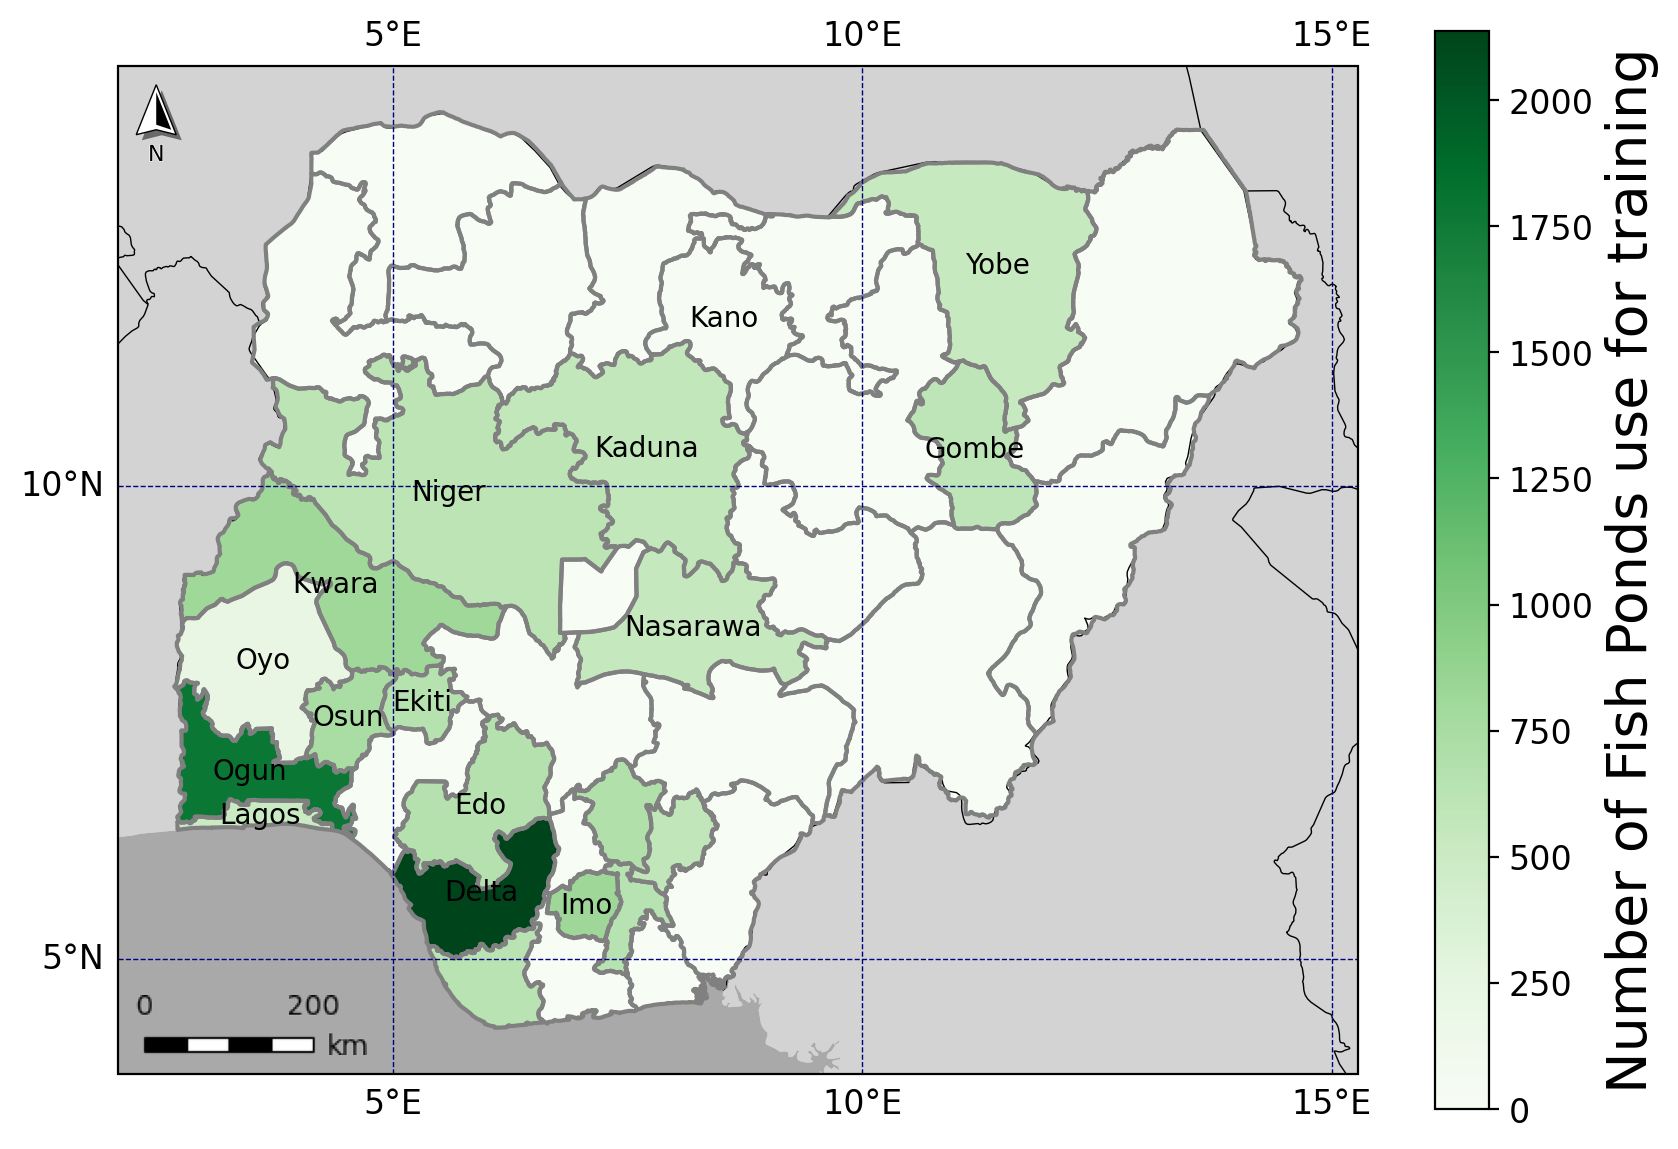

In [123]:
crs_epsg = ccrs.epsg("3857")
fig, ax = plt.subplots(figsize = (10,10), subplot_kw={'projection': crs_epsg})
# ax.stock_img()
ax1 = df.plot(column="count", ax=ax, cmap='Greens',legend=True, legend_kwds={'shrink': 0.7})#, legend_kwds={'label': "Number of Fish Ponds use for training"})
df.boundary.plot(ax=ax, color='gray') 
fig1 = ax1.figure
cb_ax = fig1.axes[1] 
cb_ax.tick_params(labelsize=12)
cb_ax.set_ylabel('Number of Fish Ponds use for training', fontsize=20)

for ss in df_count1['admin1Name'].values: 
    # df[df['admin1Name'] == ss].plot(ax=ax, color='#FFD1DC')
    if ss not in ["Federal Capital Territory", "Akwa Ibom", "Abia", "Bayelsa", "Ebonyi", "Enugu"]:
        df[df['admin1Name'] == ss].apply(lambda x: ax.annotate(text=f'{x["admin1Name"]}', xy=x.geometry.centroid.coords[0], ha='center', va='center', color='black', annotation_clip=True), axis=1);
    # elif ss == "Enugu":
        # df[df['dmin1Name'] == ss].apply(lambda x: ax.annotate(text=f'{x["admin1Name"]}', xy=x.geometry.centroid.coords[0] , ha='center', fontsize=9, color='black'), axis=1);



# Format lat/lon gridlines using cartopy
lon_ticks = [0, 5, 10, 15]
lat_ticks = [5, 10]
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='navy', ls='--')
gl.xlocator = ticker.FixedLocator(lon_ticks)
gl.ylocator = ticker.FixedLocator(lat_ticks)
gl.right_labels = False
gl.bottom_labels = True
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}


import cartopy.feature as cfeature

# ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
# ax.add_feature(cfeature.LAKES, facecolor='lightgray')
# ax.add_feature(cfeature.STATES, linewidth=0.25)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='darkgray')
NorthArrow.set_size("small")
ScaleBar.set_size("small")
north_arrow(
    ax, location="upper left", rotation={"crs": crs_epsg, "reference": "center"}
)
scale_bar(ax, location="lower left", style="boxes", bar={"projection": crs_epsg, "unit": "km", "max": 200, }, 
          labels={"textcolors": "black"}, text= {"fontsize":10, "stroke_width":0})

plt.savefig('map_nigeria.png', dpi=100, bbox_inches='tight')

In [116]:
plt.show()

<Figure size 640x480 with 0 Axes>

In [99]:
help(cb_ax)

Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, forward_navigation_events='auto', **kwargs)
 |  
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |  
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |  
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |  
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes direc